In this exercise, we will be using the Breast Cancer dataset which can be downloaded from:\
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

The description of the dataset is found in this description file:\
https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

In [1]:
#load necessary packages
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the dataset into a variable called `df`. Use appropriate name for the columns and appropriate value for the class column

In [2]:
webdir = "https://archive.ics.uci.edu/ml/machine-learning-databases/"
datafile = "breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(webdir + datafile, 
                 header=None,
                names=[
                    "sample_code_number", 
                    "clump_thickness",
                    "uniformity_of_cell_size",
                    "uniformity_of_cell_shape",
                    "marginal_adhesion",
                    "single_epithelial_cell_size",
                    "bare_nuclei",
                    "bland_chromatin",
                    "normal_nucleoli",
                    "mitoses",
                    "class"
                ],
                na_values="?")
df


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [3]:
df["class"] = df["class"].replace(2, "benign")
df["class"] = df["class"].replace(4, "malignant")
df


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [4]:
df.dtypes


sample_code_number               int64
clump_thickness                  int64
uniformity_of_cell_size          int64
uniformity_of_cell_shape         int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
class                           object
dtype: object

In [5]:
df = df.dropna()
df


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


#### ❓Q1. using `value_counts()`, find the distribution between the 2 types of tumors

In [6]:
#TODO
df["class"].value_counts()


benign       444
malignant    239
Name: class, dtype: int64

#### Generate a 2-D scatterplot to visualise the distribution of the 2 types of tumors

<AxesSubplot:xlabel='clump_thickness', ylabel='uniformity_of_cell_size'>

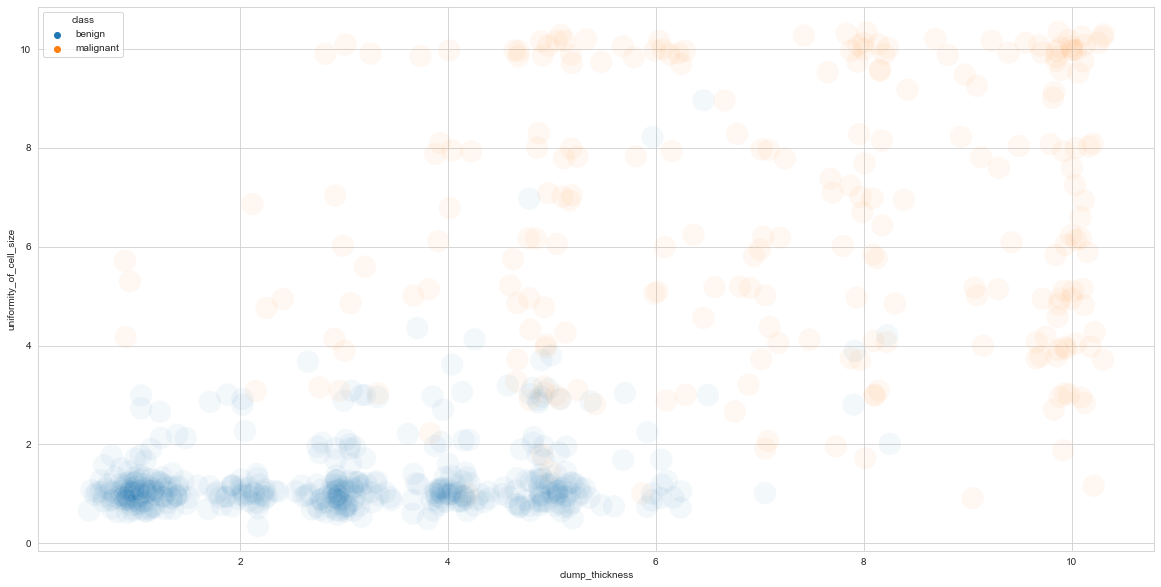

In [7]:
import numpy as np
def jitter(values):
    return values + np.random.normal(0, 0.2, size=values.shape)

plt.figure(figsize=(20,10))

sns.scatterplot(x = jitter(df["clump_thickness"]), 
                y = jitter(df["uniformity_of_cell_size"]),
                hue=df["class"], s=500, alpha=0.05)


#### ❓Q2. Perform K-means clustering by treating K = 2. (set `random_state=11` in order to replicate the exact results)

In [8]:
#TODO
X = df.iloc[:, 1:-1]
X


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [9]:
est = KMeans(n_clusters=2, random_state=4444).fit(X)
est.labels_


array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

#### ❓Q3. Generate another scatterplot (together with the existing scatterplot) using the cluster information from Q2 and compare the 2 plots. What can we say about the quality of the clusters?
You can use the following codes for creating 2 subplots together:\
`fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
sns.scatterplot(...., ax=axs[0])
sns.scatterplot(...., ax=axs[1])
`

<AxesSubplot:xlabel='clump_thickness', ylabel='uniformity_of_cell_size'>

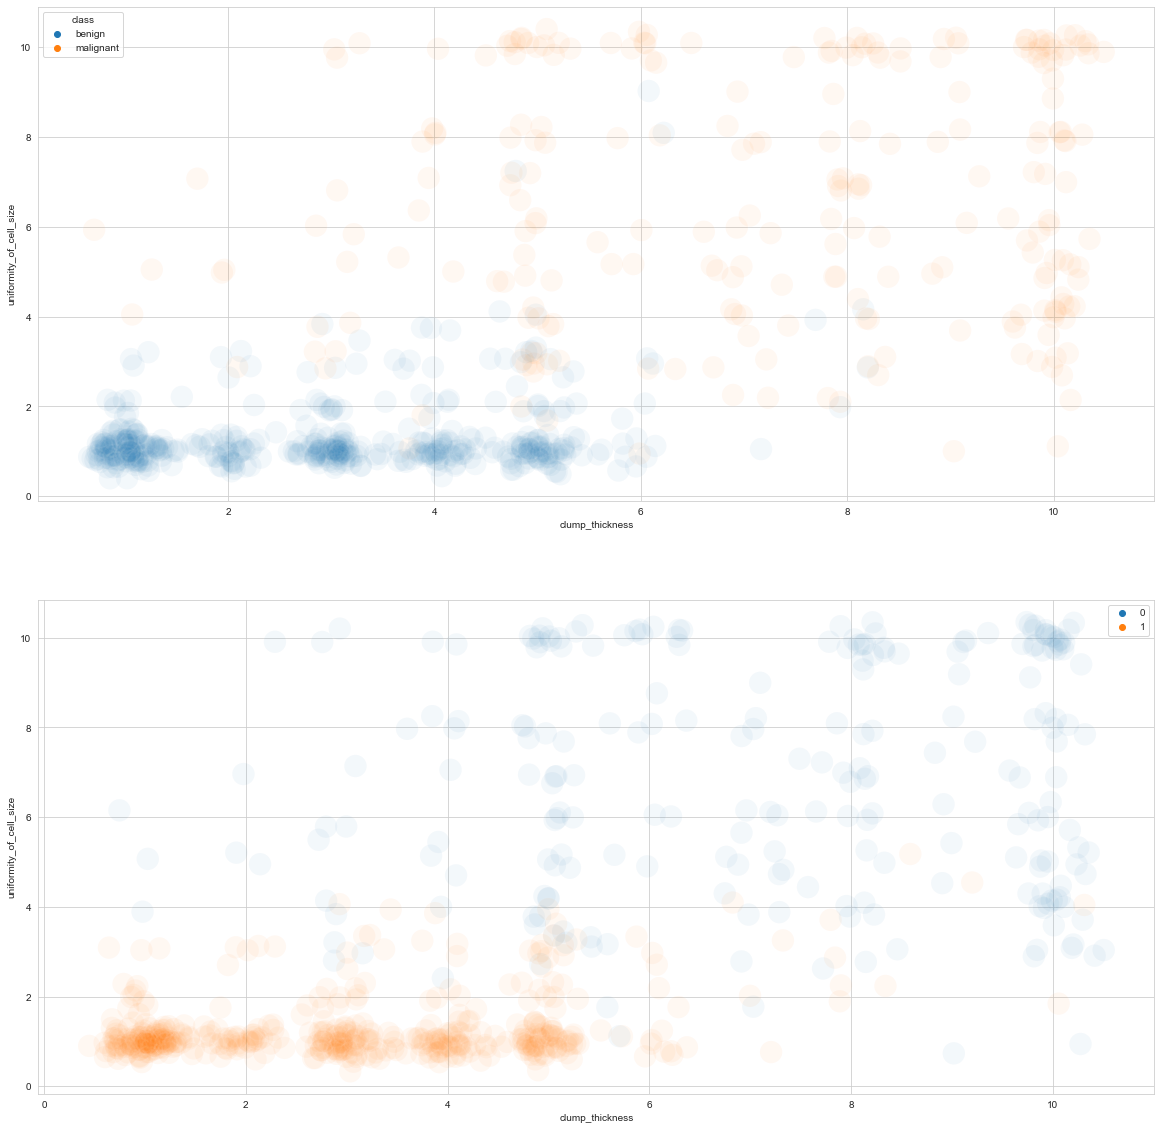

In [10]:
#TODO
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

sns.scatterplot(x = jitter(df["clump_thickness"]), 
                y = jitter(df["uniformity_of_cell_size"]),
                hue=df["class"], s=500, alpha=0.05, ax=axs[0])

sns.scatterplot(x = jitter(df["clump_thickness"]), 
                y = jitter(df["uniformity_of_cell_size"]),
                hue=1-est.labels_, s=500, alpha=0.05, ax=axs[1])


#### ❓Q4. Calculate the accuracy of the model generated in Q2

In [11]:
#TODO
c1 = sum(pd.factorize(df["class"])[0]==1-est.labels_)
c2 = len(df) - c1 
print(c1)
print(c2)


27
656


In [12]:
if c1 > c2:
    print(f"accuracy = {c1/len(df)}")
else:
    print(f"accuracy = {c2/len(df)}")
    

accuracy = 0.9604685212298683


#### ❓Q5. Do you get different accuracies if you use different random_state values?

In [13]:
#TODO
def check_cluster(random_state_val):
    est = KMeans(n_clusters=2, random_state=random_state_val).fit(X)
    
    c1 = sum(pd.factorize(df["class"])[0]==1-est.labels_)
    c2 = len(df) - c1 

    if c1 > c2:
        print(f"accuracy = {c1/len(df)}")
    else:
        print(f"accuracy = {c2/len(df)}")

check_cluster(123456)
check_cluster(9864)
check_cluster(345678)
check_cluster(9864322)
check_cluster(224569975)


accuracy = 0.9604685212298683
accuracy = 0.9604685212298683
accuracy = 0.9604685212298683
accuracy = 0.9604685212298683
accuracy = 0.9604685212298683


#### ❓Q6. Generate the accuracy when using Naive Bayes, K-Nearest Neighbors, SVM & Decision Trees (using default settings for each classifier & conducting 10-fold CV)

In [14]:
#TODO
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree


In [15]:
X = df.iloc[:,1:-1]
y = pd.factorize(df["class"])[0]

models = [GaussianNB(), MultinomialNB(), KNeighborsClassifier(), SVC(), tree.DecisionTreeClassifier()]
names = ["GaussianNB", "MulitnomialNB", "KNN", "SVM", "Decision Tree"]

for model, name in zip(models, names):
    acc = cross_val_score(model, X, y, cv=10).mean()
    print(f"{name} acc: {acc:.2f}")
    

GaussianNB acc: 0.96
MulitnomialNB acc: 0.90
KNN acc: 0.97
SVM acc: 0.97
Decision Tree acc: 0.95
